In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [8]:
#  UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
import os
os.environ["OMP_NUM_THREADS"] = "1"

# FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

- Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

## 1. Ліктевий метод

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

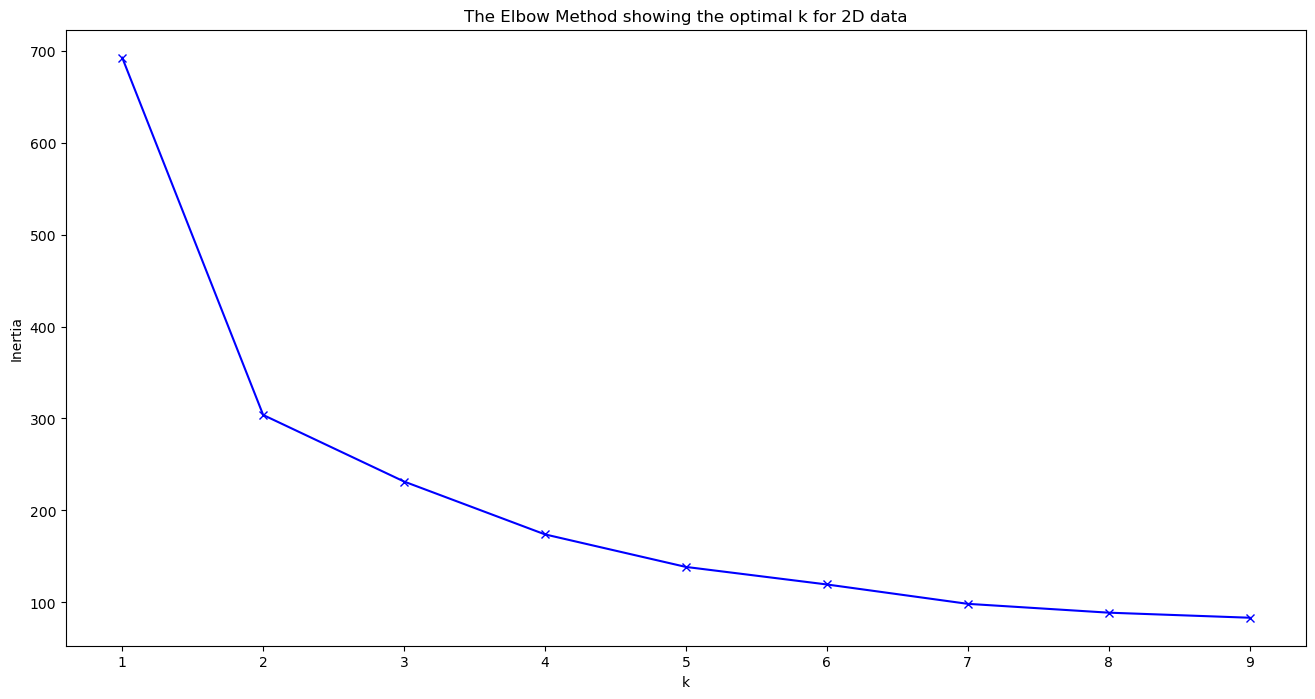

In [9]:
# Load the 2D dataset
data_2d = pd.read_csv('data/data_2d.csv', header=None)

X = data_2d.iloc[:, 1:].values  # Data
y = data_2d.iloc[:, 0].values  # Labels

# Split data into training and testing sets
data_2d_x_train, data_2d_x_test, data_2d_y_train, data_2d_y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# Apply KMeans algorithm
data_2d_models = []
data_2d_inertia = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(
        n_clusters=k,
        n_init="auto",
        random_state=0,
    )
    kmeanModel.fit(data_2d_x_train, data_2d_y_train)
    data_2d_models.append(kmeanModel)
    data_2d_inertia.append(kmeanModel.inertia_)


# Plot the elbow
plt.figure(figsize=(16,8))
plt.plot(K, data_2d_inertia, "bx-")
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k for 2D data')
plt.show()

Робимо висновок, що для 2д_дата оптимальний к=2.

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

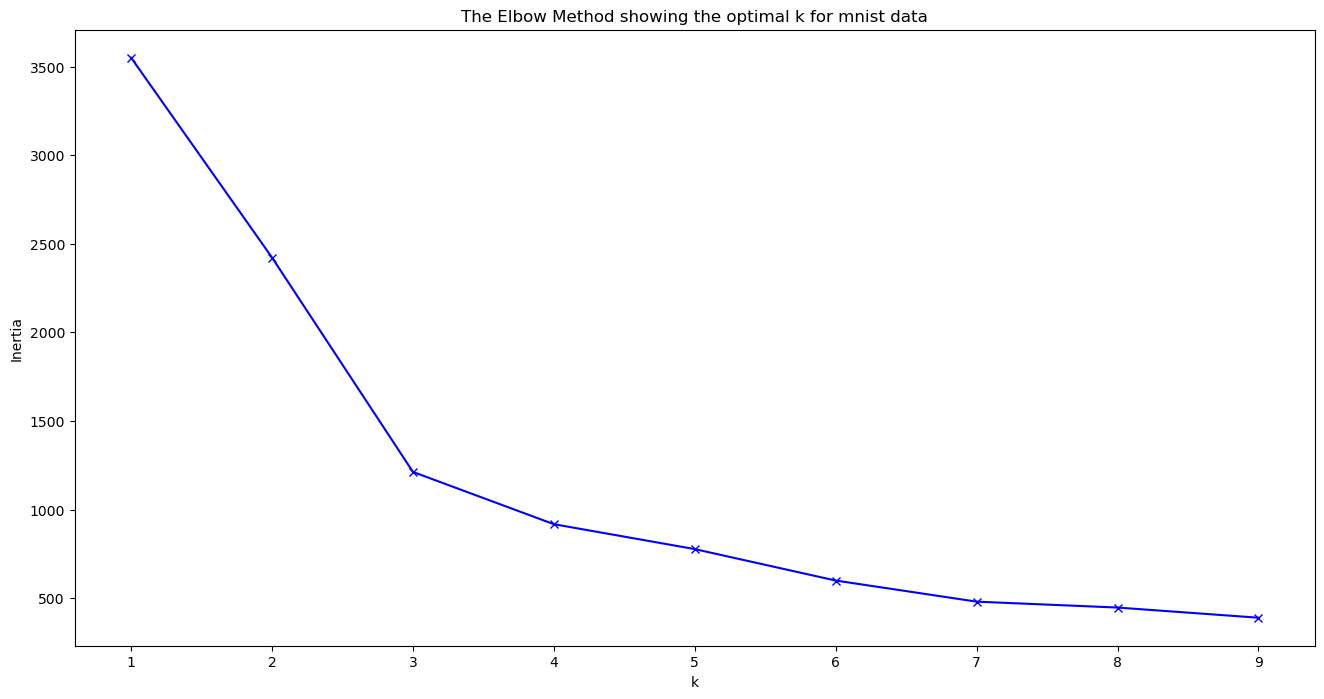

In [10]:
# Load the mnist dataset
mnist = pd.read_csv(
    "data/mnist.csv"
)
X = mnist.iloc[:, 1:].values  # Image data (pixels)
y = mnist.iloc[:, 0].values  # Labels

# Normalize pixel values to be between 0 and 1
X = X / 255.0

# Split data into training and testing sets
mnist_x_train, mnist_x_test, mnist_y_train, mnist_y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Apply PCA to the data
pca = PCA(n_components=2)
mnist_x_train = pca.fit_transform(mnist_x_train)
mnist_x_test = pca.transform(mnist_x_test)


# Apply KMeans algorithm
mnist_inertia = []
mnist_models = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init='auto')
    kmeanModel.fit(mnist_x_train)
    mnist_models.append(kmeanModel)
    mnist_inertia.append(kmeanModel.inertia_)

# Plot the elbow
plt.figure(figsize=(16,8))
plt.plot(K, mnist_inertia, "bx-")
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k for mnist data')
plt.show()

Роблю висновок, що k=3 для mnist.

Oтже, k=2 для 2д і k=3 для mnist.

## 2. Кластеризація 

Подивимось, як відбулась кластеризація для дата_2д

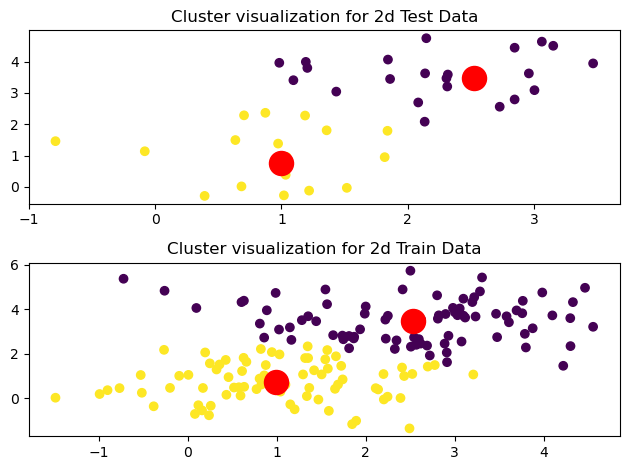

In [11]:
# Visualize data_2d_models[1] on training dataset, k=2
kmeanModel = data_2d_models[1]
labels_test = kmeanModel.predict(data_2d_x_test)
labels_train = kmeanModel.predict(data_2d_x_train)

# Plotting the cluster centers and the data points on a 2D plane
fig, axs = plt.subplots(2)

# Plot for test data
axs[0].scatter(data_2d_x_test[:, 0], data_2d_x_test[:, 1], c=labels_test)
axs[0].scatter(kmeanModel.cluster_centers_[:, 0], kmeanModel.cluster_centers_[:, 1], s=300, c="red")
axs[0].set_title('Cluster visualization for 2d Test Data')

# Plot for train data
axs[1].scatter(data_2d_x_train[:, 0], data_2d_x_train[:, 1], c=labels_train)
axs[1].scatter(kmeanModel.cluster_centers_[:, 0], kmeanModel.cluster_centers_[:, 1], s=300, c="red")
axs[1].set_title('Cluster visualization for 2d Train Data')

plt.tight_layout()
plt.show()

#### Ліктевий метод чудово відобразив факт того, що ігреків може бути всього 2 і цьому датасеті: 0 і 1.

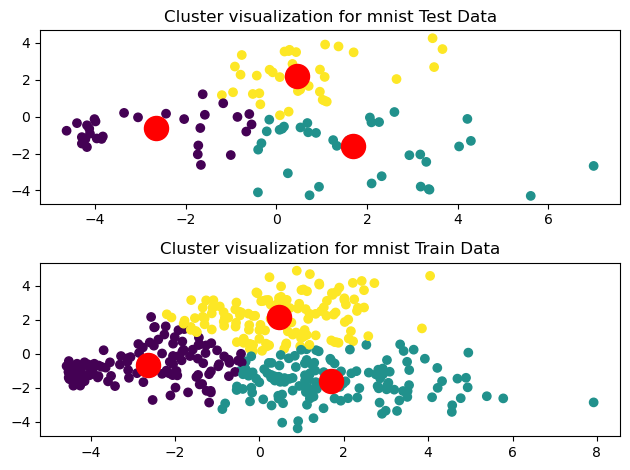

In [12]:
# Visualize mnist_models[2] on training dataset, k=3
kmeanModel = mnist_models[2]
labels_test = kmeanModel.predict(mnist_x_test)
labels_train = kmeanModel.predict(mnist_x_train)

# Plotting the cluster centers and the data points on a 2D plane
fig, axs = plt.subplots(2)

# Plot for test data
axs[0].scatter(mnist_x_test[:, 0], mnist_x_test[:, 1], c=labels_test)
axs[0].scatter(
    kmeanModel.cluster_centers_[:, 0], kmeanModel.cluster_centers_[:, 1], s=300, c="red"
)
axs[0].set_title("Cluster visualization for mnist Test Data")

# Plot for train data
axs[1].scatter(mnist_x_train[:, 0], mnist_x_train[:, 1], c=labels_train)
axs[1].scatter(
    kmeanModel.cluster_centers_[:, 0],
    kmeanModel.cluster_centers_[:, 1],
    s=300,
    c="red",
)
axs[1].set_title("Cluster visualization for mnist Train Data")

plt.tight_layout()
plt.show()

#### Для mnist після PCA бачимо три кластери. 